In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
#Opening Json Data
with open('states_daily.json') as f:
    states_daily = json.load(f)

In [3]:
#Preparing Data Frame
print(states_daily['states_daily'][0].keys())
#Getting Columns
columnNames = list(states_daily['states_daily'][0].keys())
print(columnNames)
len(states_daily['states_daily'])
#Getting Each Instanes
rows = [list(states_daily['states_daily'][i].values()) for i in range(len(states_daily['states_daily']))]
rowsArray = np.array(rows)
dataframe = pd.DataFrame(data= rowsArray, columns= columnNames)
dataframe.head(5)

dict_keys(['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dd', 'dl', 'dn', 'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status', 'tg', 'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb'])
['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dd', 'dl', 'dn', 'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status', 'tg', 'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb']


,an,ap,ar,as,br,ch,ct,date,dd,dl,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,...,0,Recovered,1,0,0,4,0,0,0,0


In [4]:
#Preprocessing of Data
arr = columnNames[0:]
arr.remove('date')
arr.remove('status')
for item in arr:
    dataframe[item] = dataframe[item].astype(int)

dataframe['date'] = pd.to_datetime(dataframe['date'])
filterStatusConfirmed = dataframe.loc[dataframe['status'] == 'Confirmed']
filterStatusRecovered = dataframe.loc[dataframe['status'] == 'Recovered']
filterStatusDeceased = dataframe.loc[dataframe['status'] == 'Deceased']
union_terr=['dl','an','jk','la','dn','py','cg','ld',] 
state=[]
for item in arr:
    if item in union_terr or item=='un' or item=='dd' or item=='tt':
        continue
    state.append(item)
print(state)
print(arr)
#filterStatusDeceased.head(5)

['ap', 'ar', 'as', 'br', 'ch', 'ct', 'ga', 'gj', 'hp', 'hr', 'jh', 'ka', 'kl', 'mh', 'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'rj', 'sk', 'tg', 'tn', 'tr', 'up', 'ut', 'wb']
['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'dd', 'dl', 'dn', 'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'tg', 'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb']


In [5]:
#Answer1_1  (If we get date from user and pass that date while comparing it is genralized)
marchToSept1_Confirmed = filterStatusConfirmed[(filterStatusConfirmed['date'] >= '2020-03-14') & (filterStatusConfirmed['date'] <= '2020-09-05')]
marchToSept1_Recovered= filterStatusRecovered[(filterStatusRecovered['date'] >= '2020-03-14') & (filterStatusRecovered['date'] <= '2020-09-05')]
marchToSept1_Deceased = filterStatusDeceased[(filterStatusDeceased['date'] >= '2020-03-14') & (filterStatusDeceased['date'] <= '2020-09-05')]
print("Confirmed:{0} \nRecovered : {1}\nDeceased : {2}".format(marchToSept1_Confirmed['tt'].sum() , marchToSept1_Recovered['tt'].sum() , marchToSept1_Deceased['tt'].sum() ))

Confirmed:4110211 
Recovered : 3177666
Deceased : 70094


In [6]:
#Answer1_2
print("Confirmed:{0} \nRecovered : {1}\nDeceased : {2}".format(marchToSept1_Confirmed['dl'].sum() , marchToSept1_Recovered['dl'].sum() , marchToSept1_Deceased['dl'].sum() ))

Confirmed:188193 
Recovered : 163785
Deceased : 4538


In [7]:
#Answer1_3
print(" Total Confirmed Cases in Delhi and Maharashtra  = {}".format(marchToSept1_Confirmed['dl'].sum() + marchToSept1_Confirmed['mh'].sum()))
print(" Total Recovered Cases in Delhi and Maharashtra  = {}".format(marchToSept1_Recovered['dl'].sum() + marchToSept1_Recovered['mh'].sum()))
print(" Total Deceased Cases in Delhi and Maharashtra  = {}".format(marchToSept1_Deceased['dl'].sum() + marchToSept1_Deceased['mh'].sum()))



Total Confirmed Cases in Delhi and Maharashtra  = 1072055
 Total Recovered Cases in Delhi and Maharashtra  = 800359
 Total Deceased Cases in Delhi and Maharashtra  = 30813


In [8]:
#Answer 1_4

max1 = 0
max2 = 0
max3 = 0

state_conf = ''
state_rec = ''
state_dec = ''
for item in arr:
    if item=='tt' or item in union_terr or item== 'un':
        continue
    count_conf = marchToSept1_Confirmed[item].sum()
    count_rec = marchToSept1_Recovered[item].sum()
    count_dec = marchToSept1_Deceased[item].sum()
    if count_conf > max1:
        max1 = count_conf
        state_conf = item
    if count_rec > max2:
        max2 = count_rec
        state_rec = item
    if count_dec > max3:
        max3 = count_dec
        state_dec = item
print("Highest Infected State is '{0}'' with total number of Confirmed cases {1}".format(state_conf,max1))
print("Highest Recovered Person State is '{0}'' with total number of Recoverd cases {1}".format(state_rec,max2))
print("Highest Infected State is '{0}' with total number of Deac cases {1}".format(state_dec,max3))



Highest Infected State is 'mh'' with total number of Confirmed cases 883862
Highest Recovered Person State is 'mh'' with total number of Recoverd cases 636574
Highest Infected State is 'mh' with total number of Deac cases 26275


In [9]:
#Answer 1_5
min1 = float('inf')
min2 = float('inf')
min3 = float('inf')
arr.remove('dd') # Daman and Diu will merge into Dadra and Nagar Haveli
l_state_conf = ''
l_state_rec = ''
l_state_dec = ''
for item in arr:
    if item =='tt' or item in union_terr or item =='un':
        continue
    count_conf = marchToSept1_Confirmed[item].sum()
    count_rec = marchToSept1_Recovered[item].sum()
    count_dec = marchToSept1_Deceased[item].sum()
    if count_conf < min1:
        min1 = count_conf
        l_state_conf = item
    if count_rec < min2:
        min2 = count_rec
        l_state_rec = item
    if count_dec < min3:
        min3 = count_dec
        l_state_dec = item

print("Lowest Infected State is '{0}'' with total number of Confirmed cases {1}".format(l_state_conf,min1))
print("Lowest Recovered Person's State is '{0}'' with total number of Recoverd cases {1}".format(l_state_rec,min2))
print("Lowest Infected State is '{0}' with total number of Deac cases {1}".format(l_state_dec,min3))

Lowest Infected State is 'mz'' with total number of Confirmed cases 1062
Lowest Recovered Person's State is 'mz'' with total number of Recoverd cases 713
Lowest Infected State is 'mz' with total number of Deac cases 0


In [10]:

#Answer 1_6
index_max_con=marchToSept1_Confirmed['dl'].idxmax()
index_max_rec=marchToSept1_Recovered['dl'].idxmax()
index_max_dec=marchToSept1_Deceased['dl'].idxmax()

date_conf=marchToSept1_Confirmed.at[index_max_con,'date']
date_conf=date_conf.date()
date_rec=marchToSept1_Recovered.at[index_max_rec,'date']
date_rec=date_rec.date()
date_dec=marchToSept1_Deceased.at[index_max_dec,'date']
date_dec=date_dec.date()


print("Highest Number of Confirmed cases in a Single day in Delhi is {0} on {1}".format(marchToSept1_Confirmed['dl'].max(),date_conf))
print("Highest Number of Recovered cases in a Single day in Delhi is {0} on {1}".format(marchToSept1_Recovered['dl'].max(),date_rec))
print("Highest Number of Deceased cases in a Single day in Delhi is {0} on {1}".format(marchToSept1_Deceased['dl'].max(),date_dec))

Highest Number of Confirmed cases in a Single day in Delhi is 3947 on 2020-06-23
Highest Number of Recovered cases in a Single day in Delhi is 7725 on 2020-06-20
Highest Number of Deceased cases in a Single day in Delhi is 437 on 2020-06-16


In [11]:
#answer 1_7
print(state)
for s in state:
    sum_conf = marchToSept1_Confirmed[s].sum()
    sum_rec = marchToSept1_Recovered[s].sum()
    sum_dec = marchToSept1_Deceased[s].sum()
    active=sum_conf -(sum_rec + sum_dec)
    print(" '{0}' :: {1} ".format(s,active))

    

['ap', 'ar', 'as', 'br', 'ch', 'ct', 'ga', 'gj', 'hp', 'hr', 'jh', 'ka', 'kl', 'mh', 'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'rj', 'sk', 'tg', 'tn', 'tr', 'up', 'ut', 'wb']
 'ap' :: 100880 
 'ar' :: 1525 
 'as' :: 28404 
 'br' :: 16735 
 'ch' :: 2143 
 'ct' :: 22320 
 'ga' :: 4945 
 'gj' :: 16266 
 'hp' :: 2023 
 'hr' :: 14912 
 'jh' :: 14980 
 'ka' :: 100224 
 'kl' :: 21867 
 'mh' :: 221013 
 'ml' :: 1374 
 'mn' :: 1872 
 'mp' :: 15687 
 'mz' :: 349 
 'nl' :: 701 
 'or' :: 25856 
 'pb' :: 15870 
 'rj' :: 14996 
 'sk' :: 561 
 'tg' :: 32405 
 'tn' :: 51580 
 'tr' :: 5905 
 'up' :: 59963 
 'ut' :: 7649 
 'wb' :: 23390 


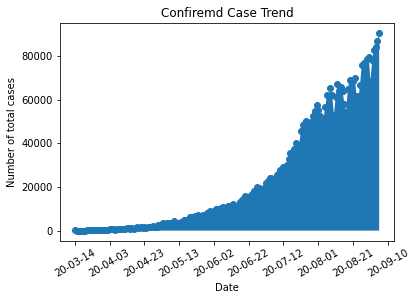

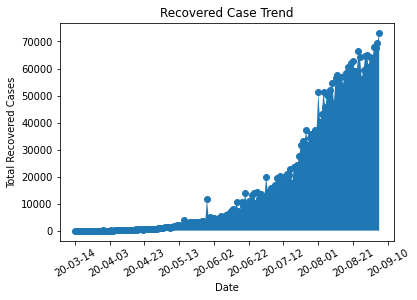

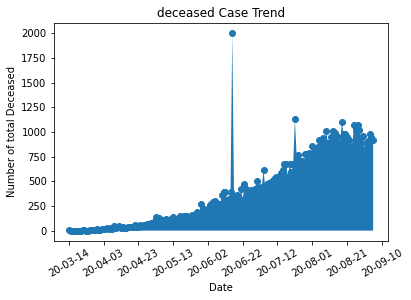

In [35]:
#Answer 2_1
from datetime import date, timedelta
import matplotlib.dates as mdates
graph_confirm = filterStatusConfirmed[(filterStatusConfirmed['date'] >= '2020-03-14') & (filterStatusConfirmed['date'] <= '2020-09-05')]
x_value_c=graph_confirm['date'].to_numpy()
#print(x_value)
y_value_c=graph_confirm['tt'].to_numpy()
plt.title('Confiremd Case Trend')
plt.xlabel('Date')
plt.ylabel('Number of total cases')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
plt.plot_date(x_value_c, y_value_c ,label="Scatter plot")
plt.fill_between(x_value_c,0,y_value_c)
plt.show()

#Recovered
graph_recover = filterStatusRecovered[(filterStatusRecovered['date'] >= '2020-03-14') & (filterStatusRecovered['date'] <= '2020-09-05')]
x_value_r=graph_recover['date'].to_numpy()
#print(x_value)
y_value_r=graph_recover['tt'].to_numpy()
plt.title('Recovered Case Trend')
plt.xlabel('Date')
plt.ylabel('Total Recovered Cases')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
plt.plot_date(x_value_r, y_value_r ,label="Scatter plot")
plt.fill_between(x_value_r,0,y_value_r)
plt.show()

#Deceased
graph_deceased = filterStatusDeceased[(filterStatusDeceased['date'] >= '2020-03-14') & (filterStatusDeceased['date'] <= '2020-09-05')]
x_value_d=graph_deceased['date'].to_numpy()
#print(x_value)
y_value_d=graph_deceased['tt'].to_numpy()
plt.title('deceased Case Trend')
plt.xlabel('Date')
plt.ylabel('Number of total Deceased')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
plt.plot_date(x_value_d, y_value_d ,label="Scatter plot")
plt.fill_between(x_value_d,0,y_value_d)
plt.show()


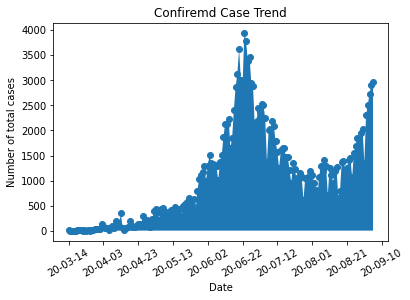

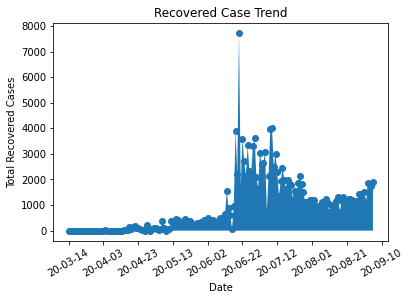

[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
   0   2   2   0   1   0   2   0   3   2   5   5   4   2   2   6   4   1
   2   2   0   1   2   3   1   0   0   0   2   3   2   3   0   0   0   1
   1   2   0   5   0  13  20   9   8   6  19  12   6  10  18  14  23  30
  15  12  15  13  82  18  57  50  33  59  44  49  53  51  62  31  79 101
 129  57  56  73 437  67  65  66  77  63  58  68  64  64  63  66  65  57
  62  61  61  59  81  63  48  50  48  45  42  34  37  40  35  41  58  26
  26  31  35  27  29  26  32  29  21  26  28  26  29  27  26  15  17  12
  11  15  23  16  13  20   8  14  14  11  10   8  18  12   9  22  13  14
  16  13  17  17  22  20  15  22  18  18  19  19  13  25]


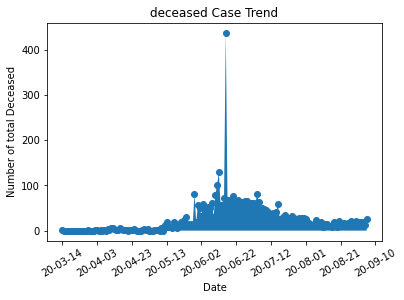

In [50]:
#Answer 2_2
from datetime import date, timedelta
import matplotlib.dates as mdates
graph_confirm = filterStatusConfirmed[(filterStatusConfirmed['date'] >= '2020-03-14') & (filterStatusConfirmed['date'] <= '2020-09-05')]
x_value_c=graph_confirm['date'].to_numpy()
#print(x_value)
y_value_c=graph_confirm['dl'].to_numpy()
plt.title('Confiremd Case Trend')
plt.xlabel('Date')
plt.ylabel('Number of total cases')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
plt.plot_date(x_value_c, y_value_c ,label="Scatter plot")
plt.fill_between(x_value_c,0,y_value_c)
plt.show()

#Recovered
graph_recover = filterStatusRecovered[(filterStatusRecovered['date'] >= '2020-03-14') & (filterStatusRecovered['date'] <= '2020-09-05')]
x_value_r=graph_recover['date'].to_numpy()
#print(x_value)
y_value_r=graph_recover['dl'].to_numpy()
plt.title('Recovered Case Trend')
plt.xlabel('Date')
plt.ylabel('Total Recovered Cases')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
plt.plot_date(x_value_r, y_value_r ,label="Scatter plot")
plt.fill_between(x_value_r,0,y_value_r)
plt.show()

#Deceased
graph_deceased = filterStatusDeceased[(filterStatusDeceased['date'] >= '2020-03-14') & (filterStatusDeceased['date'] <= '2020-09-05')]
x_value_d=graph_deceased['date'].to_numpy()
#print(x_value)
y_value_d=graph_deceased['dl'].to_numpy()
plt.title('deceased Case Trend')
plt.xlabel('Date')
plt.ylabel('Number of total Deceased')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
plt.plot_date(x_value_d, y_value_d ,label="Scatter plot")
plt.fill_between(x_value_d,0,y_value_d)
plt.show()


[   70    23    14     9    37    21    55    78    64    88    58    86
    53   135   129   102   125   288   399   450   508   510   544   403
   470   449   697   698   628   602  1104   827   715   777   611   910
  1154   787   781   862   985   865  1349   966   930  1197   944  1097
  1357  1641  1901  2471  1548  2350  1765  2131  1646  2530  1932  1537
  1626  2300  1470   662  2359  2015  2976  2473  2744  3114  3945  3670
  3252  2149  3624  3907     0  3856  3639  3640  4059  5641  5183  4416
  4678  5430  3094  4075  4523  4697  3655  3638  3723     0  1856  5877
  2745  5245  1636  5650  2369  4726  3355  3821  7628  5499  7595  4425
  5185  6927  1570  7857  8661  7692  6712  5832  5561  5903  6953  7233
 10408  9954  8353 11347 11921 16668 13285 16830 11907 10910 12596 14362
 15611 12244 16716 11488 13174 18818 16759 20168  2895 11557  6612     0
 10124 11130 10132 12146  6630  4767  3956  8357  8359  7701  9918     0
     0  3445  8852  5664  4708 10048  4007     0  1

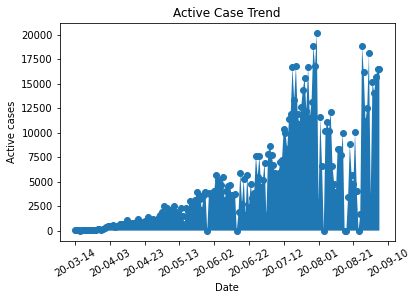

In [55]:
#Answer 2_3
from datetime import date, timedelta
import matplotlib.dates as mdates
g_Confirmed = filterStatusConfirmed[(filterStatusConfirmed['date'] >= '2020-03-14') & (filterStatusConfirmed['date'] <= '2020-09-05')]
g_Recovered= filterStatusRecovered[(filterStatusRecovered['date'] >= '2020-03-14') & (filterStatusRecovered['date'] <= '2020-09-05')]
g_Deceased = filterStatusDeceased[(filterStatusDeceased['date'] >= '2020-03-14') & (filterStatusDeceased['date'] <= '2020-09-05')]
x_value_c=g_Confirmed['date'].to_numpy()
#print(x_value)
y_c=g_Confirmed['tt']
y_r=g_Recovered['tt']
y_d=g_Deceased['tt']
y_value=[]
#print(y_c)
for (a,b,c) in zip(y_c,y_r,y_d):
    z= (a - (b + c))
    if(z<0):
        y_value.append(0) # not sure why some value is zero
    else:
        y_value.append(z)
y_value=np.array(y_value) 
print(y_value)
plt.title('Active Case Trend')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
plt.plot_date(x_value, y_value ,label="Scatter plot")
plt.fill_between(x_value,0,y_value)
plt.show()
